In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from PIL import Image 
import numpy.polynomial.polynomial as poly
from IPython.display import clear_output


%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/one

/Users/austinmcdonald/Desktop/one


In [3]:
files = os.listdir()
files

['Image1_00001.tif',
 'Image1_00002.tif',
 'Image1_00003.tif',
 'Image1_00004.tif',
 'Image1_00005.tif',
 'Image1_00006.tif',
 'Image2_00001.tif',
 'Image2_00002.tif',
 'Image2_00003.tif',
 'Image2_00004.tif',
 'Image2_00005.tif',
 'Image2_00006.tif',
 'Image2_00007.tif',
 'Image2_00008.tif',
 'Image2_00009.tif',
 'Image2_00010.tif',
 'Image2_00011.tif',
 'Image2_00012.tif',
 'Image2_00013.tif',
 'Image2_00014.tif',
 'Image2_00015.tif',
 'Image2_00016.tif',
 'Image2_00017.tif',
 'Image2_00018.tif',
 'Image2_00019.tif',
 'Image2_00020.tif',
 'Image2_00021.tif',
 'Image2_00022.tif',
 'Image2_00023.tif',
 'Image2_00024.tif',
 'Image2_00025.tif',
 'Image2_00026.tif',
 'Image2_00027.tif',
 'Image2_00028.tif',
 'Image2_00029.tif',
 'Image2_00030.tif',
 'Image2_00031.tif',
 'Image2_00032.tif',
 'Image2_00033.tif',
 'Image2_00034.tif',
 'Image2_00035.tif',
 'Image2_00036.tif',
 'Image2_00037.tif',
 'Image2_00038.tif',
 'Image2_00039.tif',
 'Image2_00040.tif',
 'Image2_00041.tif',
 'Image2_0004

In [3]:
Nsmt = 20
files = os.listdir()
files = files[1:] # gets rid of ds.store
files = files[9:] # the first few images in one were funny
filesI = files[:Nsmt]
filesF = files[-Nsmt:]

In [20]:
II = dict()
FF = dict()
Ia=np.zeros((512,512))
Fa=np.zeros((512,512))

for x in range(0,len(filesI)):
    HOLD = Image.open(filesI[x])
    II[x] = np.array(HOLD)
    Ia += II[x]
for x in range(0,len(filesF)):
    HOLD = Image.open(filesF[x])
    FF[x] = np.array(HOLD)
    Fa += FF[x]
InitalImage = Ia/len(filesI)
FinalImage  = Fa/len(filesF)

In [21]:
Row = 6
Col = 6
Xindex = 363 
Yindex = 323
ImageIM = InitalImage[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
ImageFM = FinalImage[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

In [23]:
ImageIM.shape

(13, 13)

In [24]:
minnI=[]
minnF=[]
for x in range(0,13):
    minnI.append(min(ImageIM[x]))
    minnF.append(min(ImageFM[x]))
print('min of Inital =',min(minnI) )
print('min of Final =',min(minnF) )

min of Inital = 2295
min of Final = 2314


In [13]:
Row = 6
Col = 6
Xindex = 363 
Yindex = 323
ImageIM = np.array(Image.open(files[1420]))[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
ImageFM = np.array(Image.open(files[1510]))[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

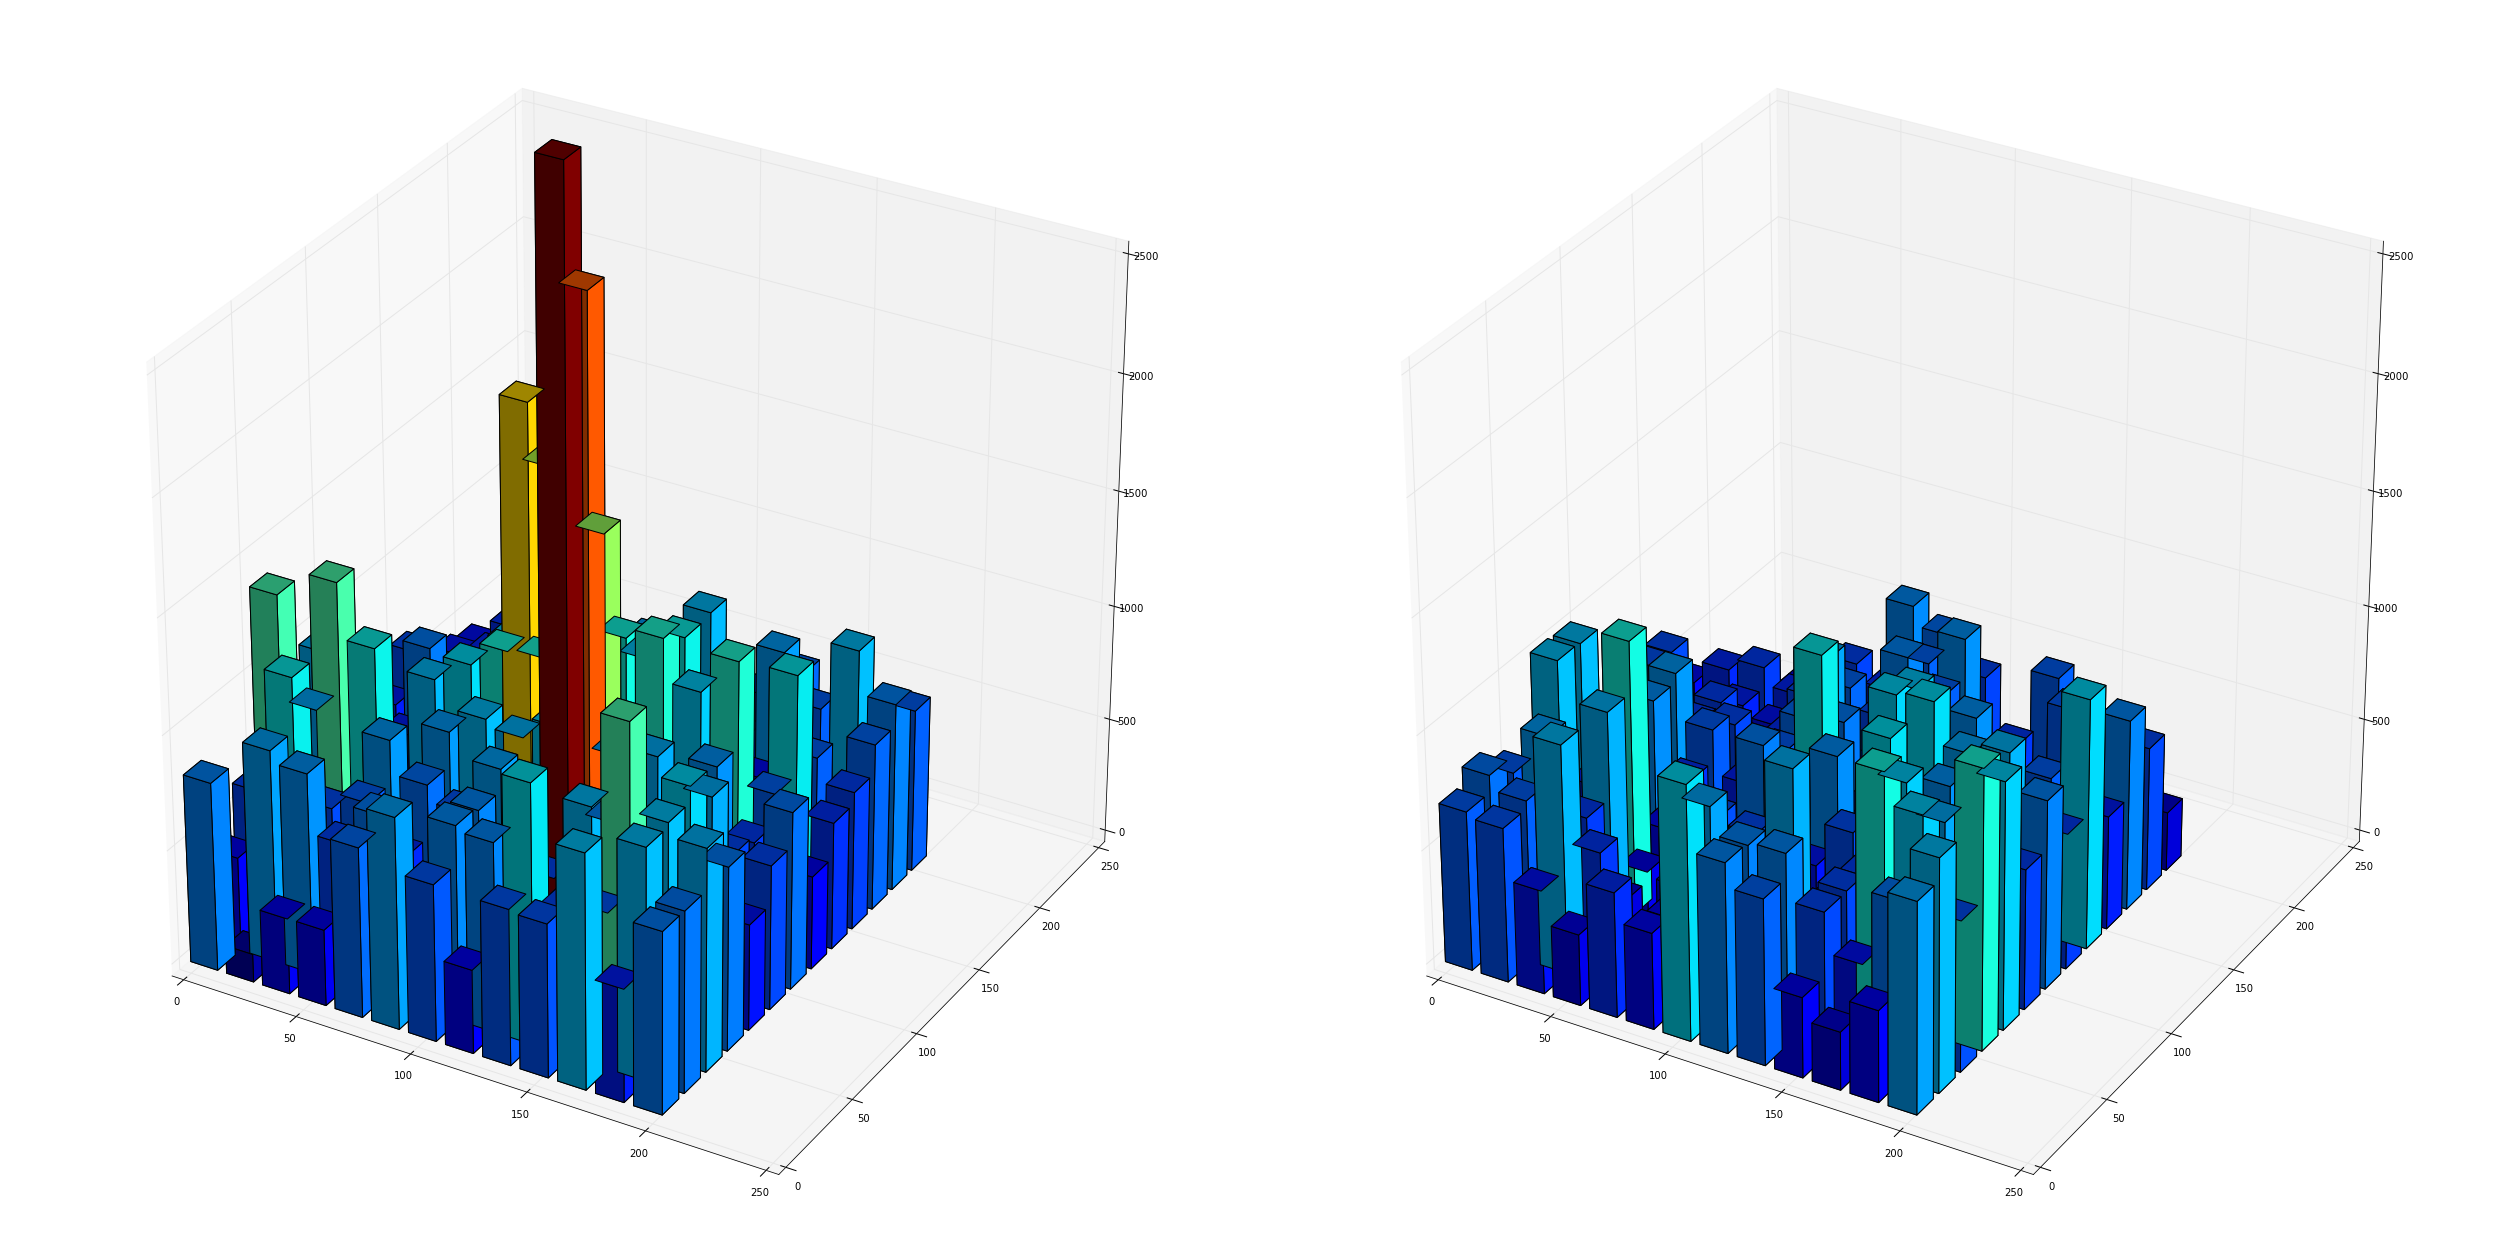

In [26]:
from mpl_toolkits.mplot3d import Axes3D

data = ImageIM-2290
data2 = ImageFM-2290


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*16  
ypos = ypos.flatten()*16
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(35,35))
ax = fig.add_subplot(221, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, 12,12,data.flatten(), color=colors)

ax2 = fig.add_subplot(222, projection='3d',sharez=ax,sharey=ax)
###ax2.title.set_text('')
colors2 = plt.cm.jet(data2.flatten()/float(data.max()))
ax2.bar3d(xpos,ypos,zpos, 12,12,data2.flatten(), color=colors2)
ax.set_zlim(0, 2500)

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/one-2-hists.pdf')
plt.show()

In [16]:
ImageIM.max()

6072.1000000000004

In [39]:
ImageIM[10]

array([ 2132.2 ,  2110.6 ,  2117.1 ,  2143.9 ,  2150.6 ,  2195.6 ,
        2252.15,  2393.4 ,  2617.4 ,  2744.6 ,  2453.9 ,  2316.75,
        2280.35,  2252.5 ,  2182.05,  2164.9 ,  2147.6 ,  2190.55,
        2203.6 ,  2177.5 ,  2174.45])

In [6]:
files = os.listdir()
files = files[1300:1600]

In [39]:
files = os.listdir()
files = files[1300:1600]

In [44]:
Row = 3
Col = 3
Xindex = 363 
Yindex = 323
Row2 = 3
Col2 = 3
Xindex2 = 357
Yindex2 = 322#3
area = []
areabackground = []
Shape = 512
xvs = np.arange(0,Shape)
for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    ImageB = []
    for x in range(0,Shape):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)
    Ahold = np.array(ImageB)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
    ABhold = np.array(ImageB)[Yindex2-Row2:Yindex2+Row2+1,Xindex2-Col2:Xindex2+Col2+1]
    area.append(Ahold.sum())
    areabackground.append(ABhold.sum())
    Ahold = None
    ABhold = None

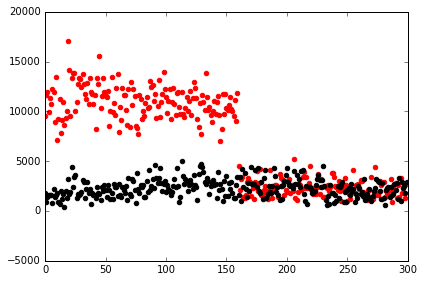

In [46]:
h=np.arange(0,len(files))
plt.scatter(h,area,color='r')
plt.scatter(h,areabackground,color='k')
plt.xlim(0,300)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/2Step2.pdf')

In [77]:
areabackground = np.array(areabackground)
area = np.array(area)
AB = areabackground/1e4
A = area/1e4
h=np.arange(-40,len(A)-40)
ABm = np.mean(AB)


In [78]:
K=5
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 
ma = running_mean(A-ABm,K)
mab = running_mean(AB-ABm,K)
hs = running_mean(h,K)

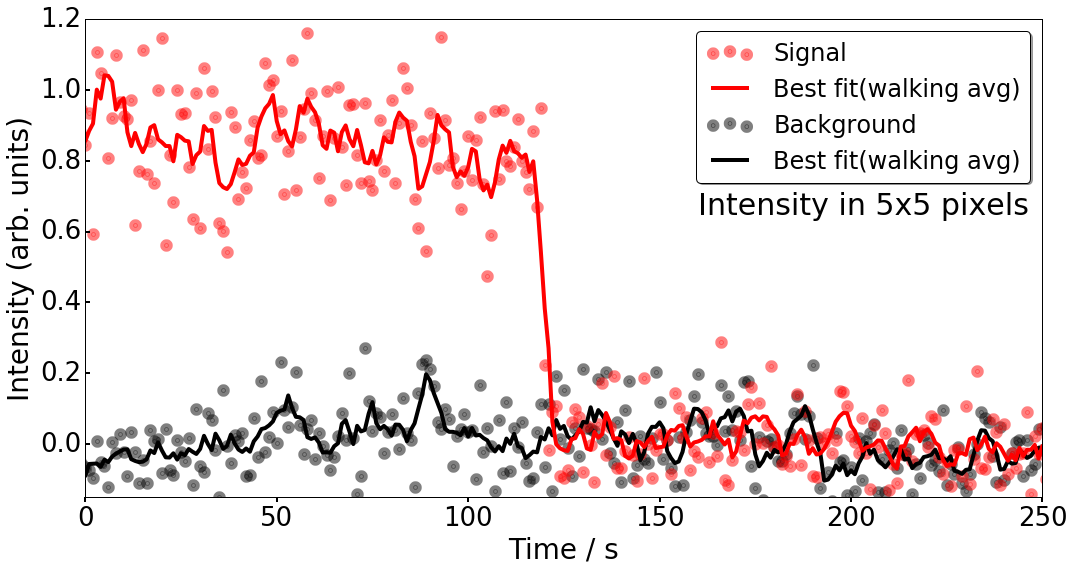

In [86]:
fig, ax = plt.subplots(figsize=(15,8))

h=np.arange(-40,len(A)-40)
b1 = ax.scatter(h,AB-ABm, color='k',label='Background', alpha=0.5,linewidth=8)
bf1 = ax.plot(hs,mab,color='k',label='Best fit(walking avg)',linewidth=4)

s1 = ax.scatter(h,A-ABm,color='r',label='Signal', alpha=0.5,linewidth=8)
sf1 = ax.plot(hs,ma,color='r',label='Best fit(walking avg)',linewidth=4)

ax.set_xlim(0,250)
ax.set_ylim(-0.15,1.2)

ax.set_xlabel(r'Time / s', fontsize=28)
ax.set_ylabel('Intensity (arb. units)', fontsize=28)

#plt.legend((s1,sf1,b1,bf1),('Signal','Best fit(walking avg)', 'Background','Best fit(walking avg)'),
#           loc='upper right',fontsize=24,shadow=True, fancybox=True)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[3], handles[1], handles[2], handles[0]]
labels = [labels[3], labels[1], labels[2], labels[0]]

ax.legend(handles,labels,fontsize=24,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
#plt.xticks([450,475,500,525,550,575,600,625],ha='left')
ax.tick_params(top="off",right='off')
ax.tick_params(axis='x', direction='out',width=2,length=5)
ax.tick_params(axis='y',width=2,length=5)
plt.text(160,0.65,r'Intensity in 5x5 pixels',rotation=0,fontsize=30,color='k')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/1step.pdf')
plt.show()

In [108]:
files = os.listdir()
files = files[1300:1600]

In [109]:
files = files[100:150]

In [110]:
# 1 = 100->150
# 0 = 200->250
Xindex = 363 
Yindex = 323
Shape = 512
Row = int(8) # define the area to take around the spots
Col = int(8) # define the area to take around the spots
xvs = np.arange(0,Shape)
DataS=np.zeros(Shape**2).reshape((Shape,Shape))

for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    ImageB = []
    for x in range(0,Shape):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)
    DataS = DataS + ImageB
    
DataF = (np.array(DataS)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/len(files)
#DataF = (DataS[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/len(files)

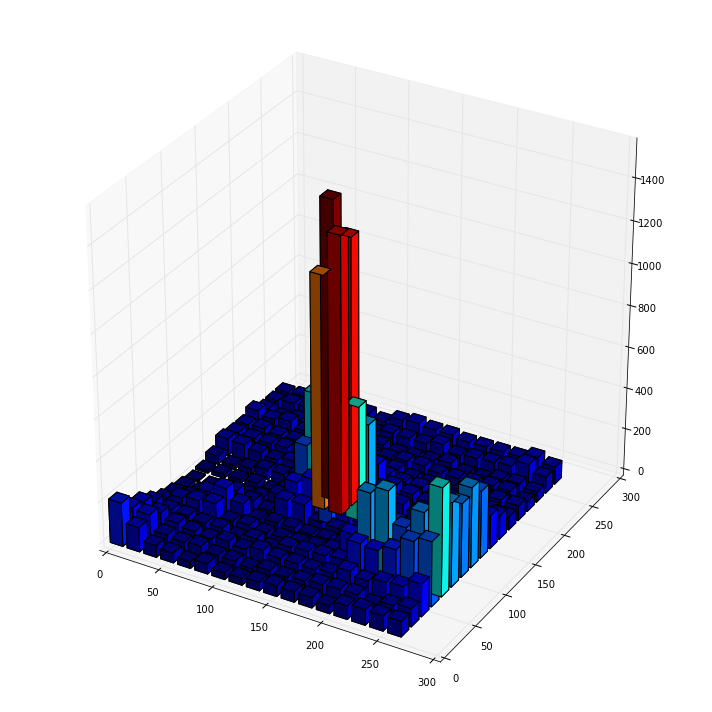

In [111]:
from mpl_toolkits.mplot3d import Axes3D

#data = ImageIM-2200
#data = ImageFM-2200
data = DataF

###########

##########
ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*16  
ypos = ypos.flatten()*16
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
#colors = plt.cm.jet(data.flatten()/float(dd))

ax.bar3d(xpos,ypos,zpos, 12,12,data.flatten(), color=colors)


ax.set_zlim(0, 1550)

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/1step-0.pdf')
plt.show()

In [97]:
dd = data.max()
dd

1521.7427359261117